In [19]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# specify path


In [20]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# number of classes set

In [21]:
NUM_CLASSES = 5

# loading training data

In [22]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [23]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# building the model

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [26]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [28]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model training

In [29]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
36/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2417 - loss: 1.6100
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2505 - loss: 1.5967 - val_accuracy: 0.4962 - val_loss: 1.3085
Epoch 2/1000
39/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4383 - loss: 1.3342
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4405 - loss: 1.3304 - val_accuracy: 0.5687 - val_loss: 1.1201
Epoch 3/1000
40/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5140 - loss: 1.1596
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5147 - loss: 1.1580 - val_accuracy: 0.7101 - val_loss: 0.9513
Epoch 4/1000
34/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5679 - loss: 1.0362
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
4

Epoch 55/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3760 - accuracy: 0.8672
Epoch 00055: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.8241 - val_loss: 0.2242 - val_accuracy: 0.9578
Epoch 56/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4607 - accuracy: 0.7734
Epoch 00056: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.8277 - val_loss: 0.2168 - val_accuracy: 0.9605
Epoch 57/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4946 - accuracy: 0.7969
Epoch 00057: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.8214 - val_loss: 0.2211 - val_accuracy: 0.9578
Epoch 58/1000
25/27 [==========================>...] - ETA: 0s - loss: 0.4393 - ac

Epoch 82/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5132 - accuracy: 0.8047
Epoch 00082: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.8460 - val_loss: 0.2045 - val_accuracy: 0.9605
Epoch 83/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4239 - accuracy: 0.8125
Epoch 00083: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.8313 - val_loss: 0.1984 - val_accuracy: 0.9605
Epoch 84/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4853 - accuracy: 0.8203
Epoch 00084: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4357 - accuracy: 0.8304 - val_loss: 0.2024 - val_accuracy: 0.9623
Epoch 85/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4782 - ac

Epoch 109/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7969
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8379 - val_loss: 0.1955 - val_accuracy: 0.9659
Epoch 110/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8281
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8505 - val_loss: 0.2020 - val_accuracy: 0.9614
Epoch 111/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8828
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8433 - val_loss: 0.1984 - val_accuracy: 0.9632
Epoch 112/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4205 

In [30]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9492 - loss: 0.1499 


In [31]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [32]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
[9.8254931e-01 1.7449925e-02 7.8192937e-07 4.0713082e-09 6.8499109e-09]
0


# confusion matrix

In [34]:
!pip install seaborn

     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     -------------- ----------------------- 112.6/294.9 kB 3.3 MB/s eta 0:00:01
     ------------------------------------ - 286.7/294.9 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 3.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


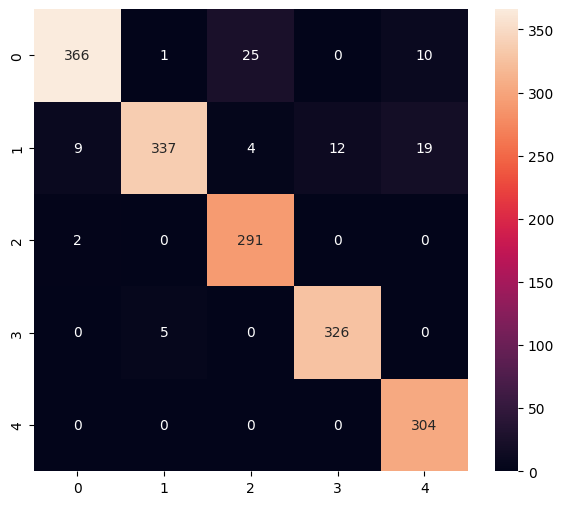

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       402
           1       0.98      0.88      0.93       381
           2       0.91      0.99      0.95       293
           3       0.96      0.98      0.97       331
           4       0.91      1.00      0.95       304

    accuracy                           0.95      1711
   macro avg       0.95      0.95      0.95      1711
weighted avg       0.95      0.95      0.95      1711



In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite

In [ ]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [ ]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

# inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))